# Topic 2. Visual data analysis in Python

### Part 1. Visualization: from Simple Distributions to Dimensionality Reduction


### Article outline
1. Dataset
2. Univariate visualization
        2.1 Quantitative features
        2.2 Categorical and binary features
3. Multivariate visualization
        3.1 Quantitative vs. Quantitative
        3.2 Quantitative vs. Categorical
        3.3 Categorical vs. Categorical
4. Whole dataset visualizations
        4.1 Naive approach
        4.2 Dimensionality reduction
        4.3 t-SNE
5. Demo assignment
6. Useful resources

# 1. DataSet
Before we get to the data, let's initialize our environment:

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  #Provides a MATLAB-like plotting framework.

import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
sns.set() #To switch to seaborn defaults, simply call the set() function.

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [5]:
df = pd.read_csv('../Data/telecom_churn.csv')

df.head() #Seank Peak

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# Nulls 
df.isna().any()

State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool

In [7]:
df.isnull().sum() 

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
df.shape

(3333, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


The last data column, Churn, is our target variable. It is binary: True indicates that that the company eventually lost this customer, and False indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a target.

# 2. Univariate visualization

Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

### 2.1 Quantitative features
Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

#### Histograms and density plots
The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method hist().

In [10]:
features = ['Total day minutes','Total intl calls']
df[features].head()

,Total day minutes,Total intl calls
0,265.1,3
1,161.6,3
2,243.4,5
3,299.4,7
4,166.7,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016A536DE5C0>,
      dtype=object)

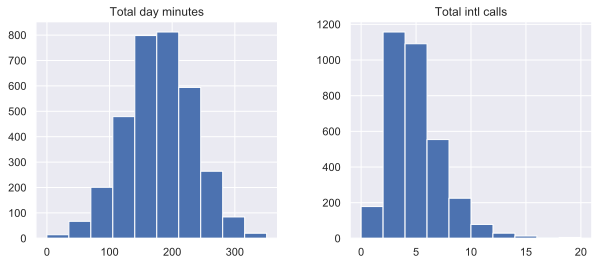

In [11]:
df[features].hist(figsize = (10,4))

**Density plots** or, more formally, Kernel Density Plots. 

They can be considered a smoothed version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016A53BF02E8>,
      dtype=object)

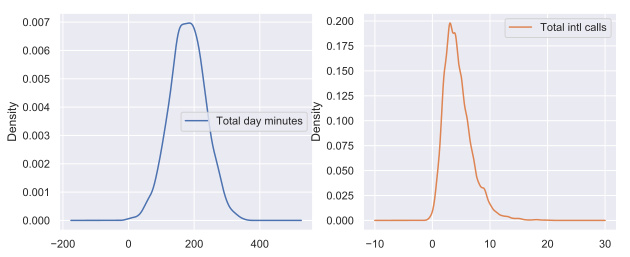

In [12]:
df[features].plot(kind = 'density', subplots = True, layout = (1,2), figsize = (10, 4), sharex = False)

**BOX PLOTS**

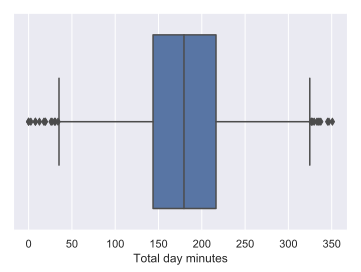

In [13]:
sns.boxplot(x='Total day minutes', data=df);

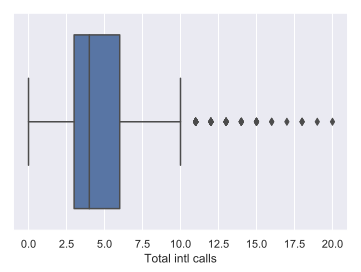

In [14]:
sns.boxplot(x='Total intl calls', data=df);

In [15]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


#### 2.2 Categorical and binary features

In [16]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

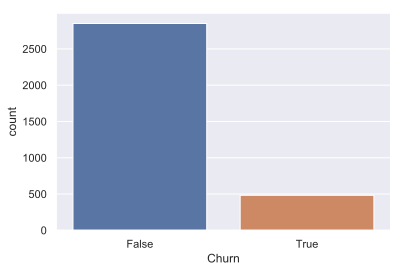

In [17]:
sns.countplot(x='Churn', data = df)

# 3. MultiVariate Visualization

Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 3.1 Quantitative vs. Quantitative

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

In [18]:
numerical = df.select_dtypes(['number'])
to_drop = ['Area code', 'Customer service calls']
numerical = numerical.drop(columns = to_drop)
numerical.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [19]:
corr_matrix = numerical.corr()

In [20]:
corr_matrix

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
Account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546
Number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884
Total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
Total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
Total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
Total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
Total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
Total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
Total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
Total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630


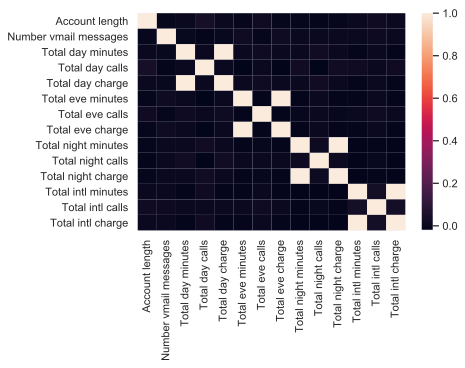

In [21]:
sns.heatmap(corr_matrix)

there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information.

In [22]:
to_drop_2 = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
numerical = numerical.drop(columns=to_drop_2)
numerical.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3


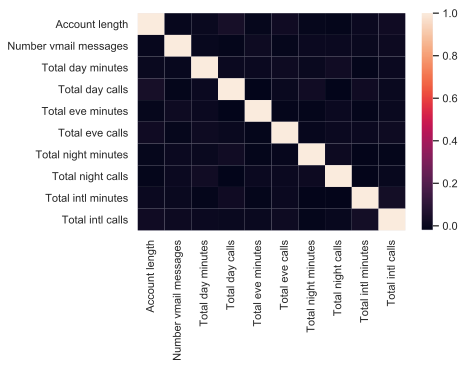

In [23]:
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix)

#### Scatter plot
The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

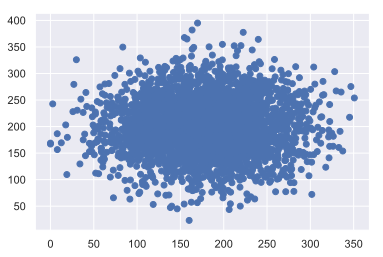

In [24]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

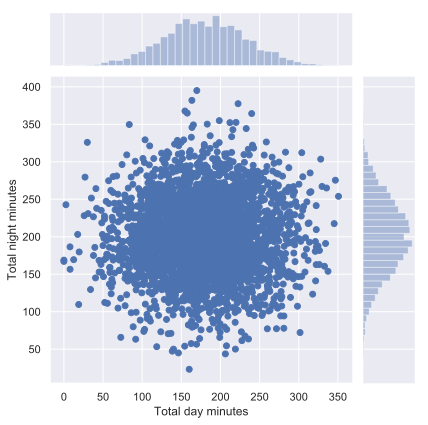

In [25]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

#### 3.2 Quantitative vs. Categorical

More specifically, let's see how the input variables are related to the target variable Churn.

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the scatter() function seen above, but, let's try a new function called lmplot() and use the parameter hue to indicate our categorical feature of interest:

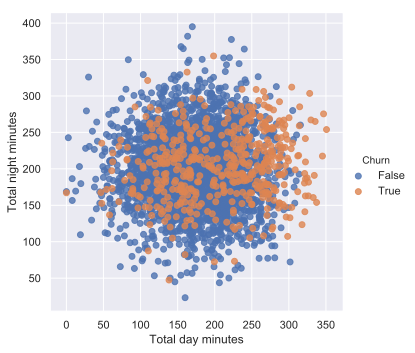

In [26]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);


#### 3.3 Categorical vs. Categorical

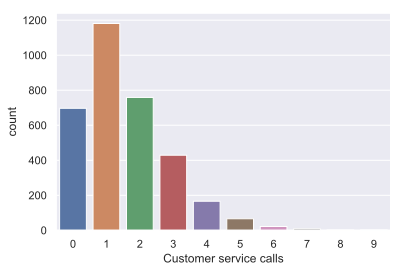

In [27]:
sns.countplot(x='Customer service calls', data=df);

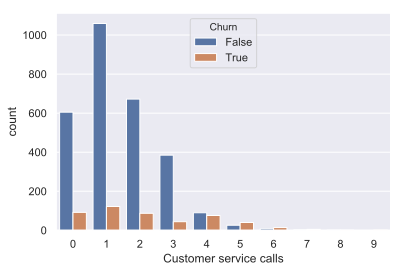

In [28]:
sns.countplot(x='Customer service calls',hue='Churn' ,data=df);

#### Dimensionality Reduction

In [29]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

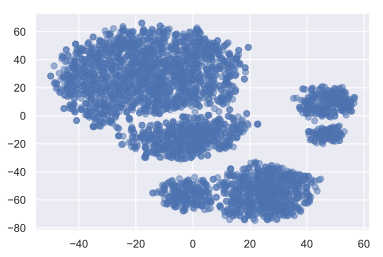

In [34]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);


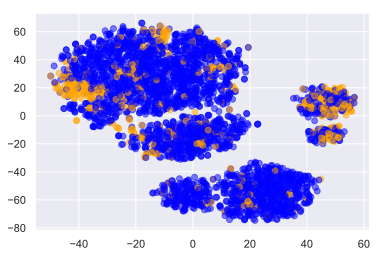

In [35]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);